In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report
from statistics import mean
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score, accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

In [3]:
hp_oHe = pd.read_csv('HP_OHE_3class.csv')
hp_oHe.drop(hp_oHe.tail(17).index,inplace=True) 
hp_oHe = hp_oHe.drop('Unnamed: 0',axis=1)

hp_ME = pd.read_csv("harryPotterClean.csv")
hp_ME.drop(hp_ME.tail(17).index,inplace=True) 
hp_ME = hp_ME.drop('Unnamed: 0',axis=1)

hp_OE = pd.read_csv("harryPotterCleanOE.csv")
hp_OE.drop(hp_OE.tail(17).index,inplace=True) 
hp_OE = hp_OE.drop('Unnamed: 0',axis=1)

In [4]:
def getXandY(df):
    df.drop(df.tail(20).index,inplace=True) 
    x = df.drop(['HP_Forbidden_clean'],axis=1)
    y = df.HP_Forbidden_clean
    return(x,y)

def trainTest(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True)
    return(X_train, X_test, y_train, y_test)

#Function to perform oversampling
def overSampling(X_train, y_train, y_test, method):
    X_train_os, y_train_os= method.fit_resample(X_train, y_train)
    # Check the number of records after over sampling
    #print(sorted(Counter(y_train_os).items())) 
    return(X_train_os, y_train_os)

smote = SMOTE(random_state=42)

In [ ]:
# change the y class to [0-2]
a = hp_oHe.HP_Forbidden_clean.replace([1,2,3], [0,1,2])

#Create the final dataframe
df=pd.DataFrame(a)
hp2=hp_oHe.drop('HP_Forbidden_clean',axis=1)
hp_oHe=pd.concat([hp2, df], axis=1)
hp_oHe.HP_Forbidden_clean.unique()

array([1., 0., 2.])

In [ ]:
#split our dataframe into X and Y
x,y=getXandY(hp_oHe)
#split the dataFrame into test and train
X_train, X_test, y_train, y_test = trainTest(x,y)
#Oversample the train dataset with SMOTE
X_train_os, y_train_os=overSampling(X_train, y_train, y_test, smote)

In [ ]:
# determine the number of input features
n_features = X_train_os.shape[1]

First try

In [ ]:
# define model
model1 = Sequential()
model1.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model1.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(3, activation='softmax'))

# compile the model
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model1.fit(X_train_os, y_train_os, epochs=150, batch_size=32, verbose=2)
# evaluate the model
loss, acc = model1.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.3f' % acc)

Epoch 1/150
528/528 - 1s - loss: 1.1182 - accuracy: 0.3369 - 954ms/epoch - 2ms/step
Epoch 2/150
528/528 - 1s - loss: 1.0972 - accuracy: 0.3557 - 853ms/epoch - 2ms/step
Epoch 3/150
528/528 - 1s - loss: 1.0928 - accuracy: 0.3704 - 811ms/epoch - 2ms/step
Epoch 4/150
528/528 - 1s - loss: 1.0885 - accuracy: 0.3897 - 604ms/epoch - 1ms/step
Epoch 5/150
528/528 - 1s - loss: 1.0846 - accuracy: 0.4038 - 578ms/epoch - 1ms/step
Epoch 6/150
528/528 - 1s - loss: 1.0805 - accuracy: 0.4194 - 546ms/epoch - 1ms/step
Epoch 7/150
528/528 - 1s - loss: 1.0757 - accuracy: 0.4294 - 555ms/epoch - 1ms/step
Epoch 8/150
528/528 - 1s - loss: 1.0696 - accuracy: 0.4445 - 565ms/epoch - 1ms/step
Epoch 9/150
528/528 - 1s - loss: 1.0609 - accuracy: 0.4617 - 552ms/epoch - 1ms/step
Epoch 10/150
528/528 - 1s - loss: 1.0496 - accuracy: 0.4770 - 573ms/epoch - 1ms/step
Epoch 11/150
528/528 - 1s - loss: 1.0370 - accuracy: 0.4915 - 575ms/epoch - 1ms/step
Epoch 12/150
528/528 - 1s - loss: 1.0239 - accuracy: 0.4996 - 576ms/epoch 

Now let's add one more layer and see how it behaves. Second try



In [ ]:
# define model
model2 = Sequential()
model2.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model2.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(3, activation='softmax'))

# compile the model
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model2.fit(X_train_os, y_train_os, epochs=150, batch_size=32, verbose=2)
# evaluate the model
loss, acc = model2.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.3f' % acc)

Epoch 1/150
528/528 - 2s - loss: 1.1014 - accuracy: 0.3417 - 2s/epoch - 3ms/step
Epoch 2/150
528/528 - 1s - loss: 1.0969 - accuracy: 0.3503 - 979ms/epoch - 2ms/step
Epoch 3/150
528/528 - 1s - loss: 1.0944 - accuracy: 0.3653 - 643ms/epoch - 1ms/step
Epoch 4/150
528/528 - 1s - loss: 1.0921 - accuracy: 0.3768 - 554ms/epoch - 1ms/step
Epoch 5/150
528/528 - 1s - loss: 1.0893 - accuracy: 0.3795 - 557ms/epoch - 1ms/step
Epoch 6/150
528/528 - 1s - loss: 1.0856 - accuracy: 0.3892 - 569ms/epoch - 1ms/step
Epoch 7/150
528/528 - 1s - loss: 1.0806 - accuracy: 0.4085 - 650ms/epoch - 1ms/step
Epoch 8/150
528/528 - 1s - loss: 1.0742 - accuracy: 0.4259 - 553ms/epoch - 1ms/step
Epoch 9/150
528/528 - 1s - loss: 1.0654 - accuracy: 0.4361 - 558ms/epoch - 1ms/step
Epoch 10/150
528/528 - 1s - loss: 1.0547 - accuracy: 0.4486 - 572ms/epoch - 1ms/step
Epoch 11/150
528/528 - 1s - loss: 1.0416 - accuracy: 0.4640 - 545ms/epoch - 1ms/step
Epoch 12/150
528/528 - 1s - loss: 1.0261 - accuracy: 0.4816 - 554ms/epoch - 1

In [ ]:
# define model
model = Sequential()
model.add(Dense(n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train_os, y_train_os, epochs=150, batch_size=64, verbose=2,
                    validation_data=(X_test, y_test))
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.3f' % acc)

Epoch 1/150
264/264 - 1s - loss: 1.0993 - accuracy: 0.3676 - val_loss: 1.0835 - val_accuracy: 0.3939 - 899ms/epoch - 3ms/step
Epoch 2/150
264/264 - 0s - loss: 1.0870 - accuracy: 0.3979 - val_loss: 1.0846 - val_accuracy: 0.3719 - 471ms/epoch - 2ms/step
Epoch 3/150
264/264 - 0s - loss: 1.0801 - accuracy: 0.4139 - val_loss: 1.0786 - val_accuracy: 0.3878 - 486ms/epoch - 2ms/step
Epoch 4/150
264/264 - 0s - loss: 1.0738 - accuracy: 0.4239 - val_loss: 1.0694 - val_accuracy: 0.4083 - 478ms/epoch - 2ms/step
Epoch 5/150
264/264 - 0s - loss: 1.0674 - accuracy: 0.4345 - val_loss: 1.0624 - val_accuracy: 0.4213 - 458ms/epoch - 2ms/step
Epoch 6/150
264/264 - 0s - loss: 1.0607 - accuracy: 0.4445 - val_loss: 1.0578 - val_accuracy: 0.4217 - 387ms/epoch - 1ms/step
Epoch 7/150
264/264 - 0s - loss: 1.0543 - accuracy: 0.4545 - val_loss: 1.0518 - val_accuracy: 0.4317 - 477ms/epoch - 2ms/step
Epoch 8/150
264/264 - 0s - loss: 1.0480 - accuracy: 0.4574 - val_loss: 1.0497 - val_accuracy: 0.4342 - 382ms/epoch - 1

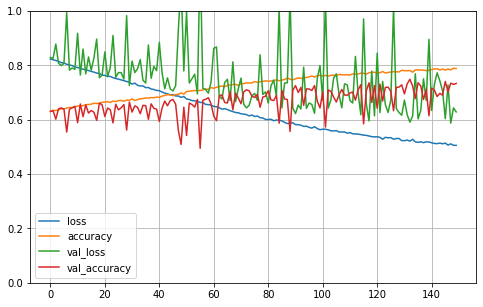

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

Different types of gradient descent

In [5]:
class MLP:

  def testGD(self,X_train_os, y_train_os,X_test, y_test, epoch, bs,LR,mom):
    # determine the number of input features
    n_features = X_train_os.shape[1]
    #define the NN architecture
    model = Sequential()
    model.add(Dense(n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(3, activation='softmax'))
    #compile the model
    opt = SGD(lr=LR, momentum=mom)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # fit the model
    history = model.fit(X_train_os, y_train_os, epochs=epoch, batch_size=bs, verbose=0,
                        validation_data=(X_test, y_test))
    # evaluate the model
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    #print('Test Accuracy: %.3f ' % acc)
    # plot learning curves
    #pyplot.plot(history.history['accuracy'], label='train')
    #pyplot.plot(history.history['val_accuracy'], label='test')
    #pyplot.title('MLP with BatchSize: {}, LR: {} and Momentum:{}'.format(bs,LR,mom))
    #pyplot.show()

    return acc


with batch size = 1
Test Accuracy: 0.154 


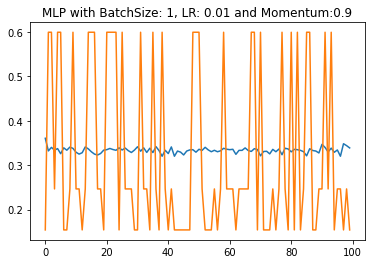

with batch size = 32
Test Accuracy: 0.807 


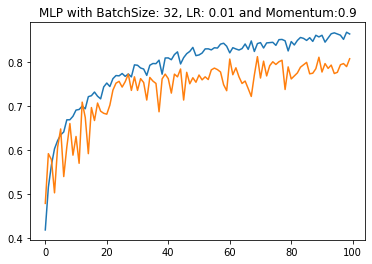

with batch size = 64
Test Accuracy: 0.783 


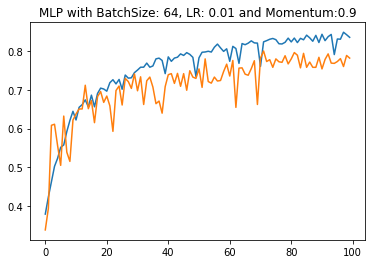

with batch size = 128
Test Accuracy: 0.787 


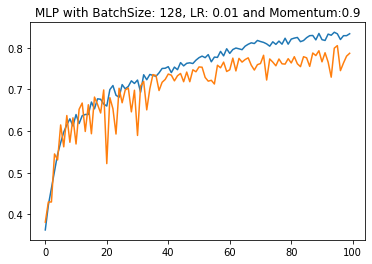

with batch size = 256
Test Accuracy: 0.753 


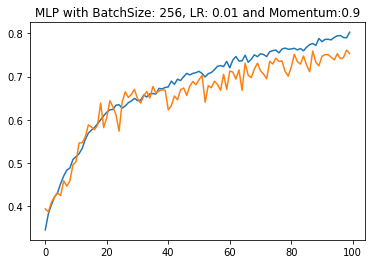

with batch size = 512
Test Accuracy: 0.704 


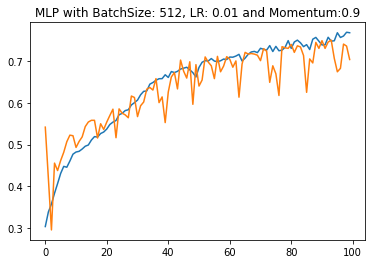

with batch size = 1024
Test Accuracy: 0.660 


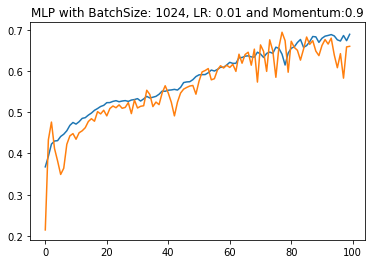

In [ ]:
diff_batchS=[1,32,64,128,256,512,1024]

for i in range(len(diff_batchS)):
  MLP().testGD(X_train_os, y_train_os,X_test, y_test, 100, diff_batchS[i],0.01,0.9)

Test Accuracy: 0.247 


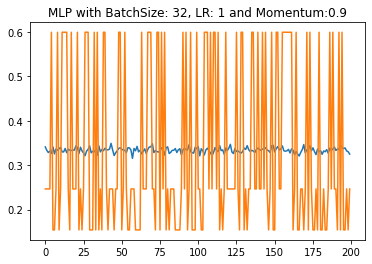

Test Accuracy: 0.154 


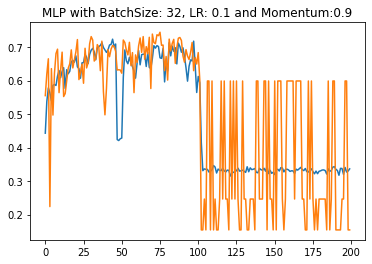

Test Accuracy: 0.820 


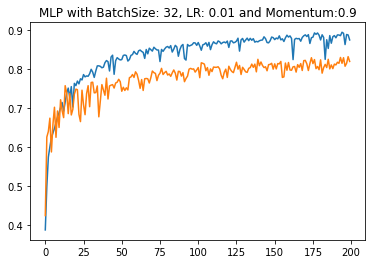

Test Accuracy: 0.766 


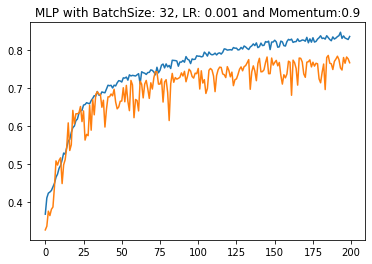

Test Accuracy: 0.633 


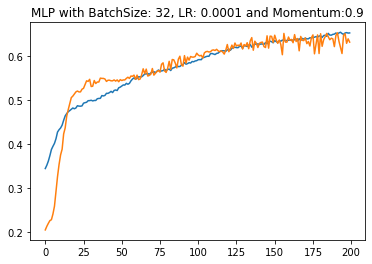

In [ ]:
diff_lr=[1,0.1,0.01,0.001,0.0001]

for i in range(len(diff_lr)):
  MLP().testGD(X_train_os, y_train_os,X_test, y_test, 200, 32,diff_lr[i],0.9)

Test Accuracy: 0.797 


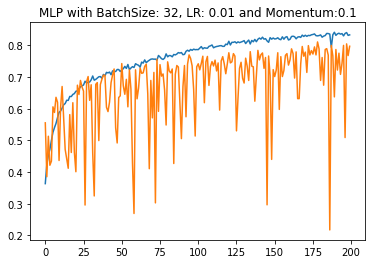

Test Accuracy: 0.802 


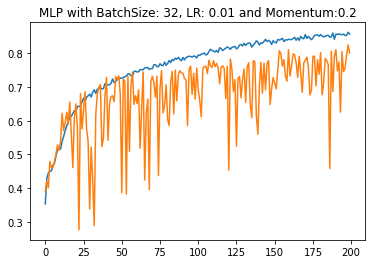

Test Accuracy: 0.764 


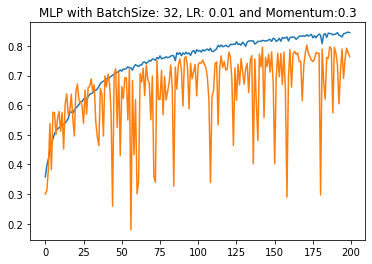

Test Accuracy: 0.489 


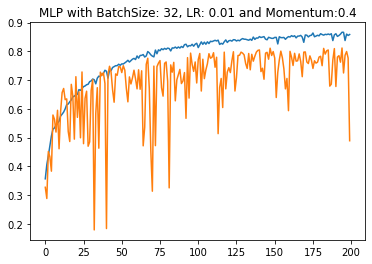

Test Accuracy: 0.802 


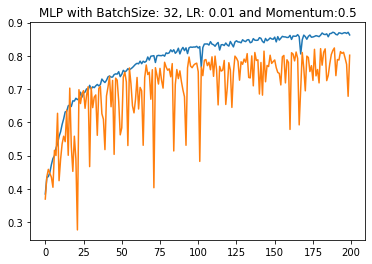

Test Accuracy: 0.723 


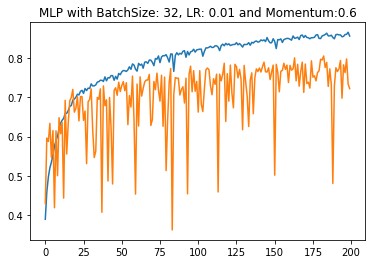

Test Accuracy: 0.806 


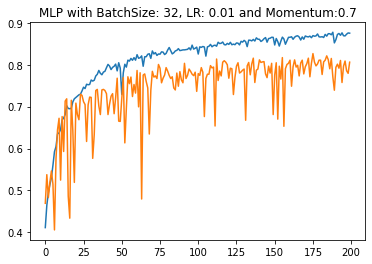

Test Accuracy: 0.811 


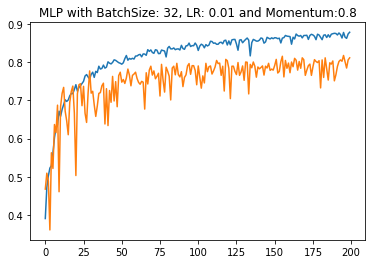

Test Accuracy: 0.814 


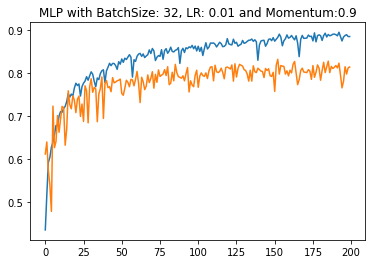

In [ ]:
diff_mom=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in range(len(diff_mom)):
  MLP().testGD(X_train_os, y_train_os,X_test, y_test, 200, 32,0.01,diff_mom[i])

In [9]:
class featureSelection:

    def testMLP(self,df,var_order,n_vars,n_loops,method):
        highest = 0
        # change the y class to [0-2]
        a = df.HP_Forbidden_clean.replace([1,2,3], [0,1,2])
        #Create the final dataframe
        df1=pd.DataFrame(a)
        hp2=df.drop('HP_Forbidden_clean',axis=1)
        hp=pd.concat([hp2, df1], axis=1)
        #split our dataframe into X and Y
        x,y=getXandY(hp)
        #create the lists to store metrics
        acc = []
        for j in range(1,n_vars):
            for i in range(n_loops):
                #split the dataFrame into test and train
                X_train, X_test, y_train, y_test = trainTest(x,y)
                #Oversample the train dataset with SMOTE
                X_train_os, y_train_os=overSampling(X_train, y_train, y_test, smote)
                #define the variables order 
                X_train_os_r = X_train_os[var_order]
                X_test_r = X_test[var_order]
                df1= X_train_os_r.iloc[:, 0:j] #use only part of the variables
                #create and train MLP
                ac = MLP().testGD(X_train_os, y_train_os,X_test_r, y_test, 100, 32 ,0.01,0.9)
                acc.append(ac)

            print(df1.columns)
            print("For {} features: \n Accuracy: {}".format(j,mean(acc)))

            if mean(acc)>highest:
                highest = mean(acc)
                best = "best accuracy = {}, with {} features, with {}".format(mean(acc),j,method)
            print(best)

        print(best)
          
    def analizeDF(self,df,order,n_vars,n_loops):
        for i in range(len(order)):
            print('------------------------- Analyzing method {} -------------------------'.format(method[i]))
            print('The variable order is: \n {}'.format(order[i]))
            featureSelection().testMLP(df,order[i],n_vars,n_loops,method[i])
            print('\n \n')


In [7]:
#Variable order in one hot encoding:
pear_corrO = ['temperature',	'holiday',	'day',	'month',	'pressure',	'dayOfTheWeek',	'shower rain',	'broken clouds',	'fog',	'overcast clouds',	'heavy intensity rain',	'minute',	'haze',	'thunderstorm with light rain',	'scattered clouds',	'clear sky',	'mist',	'light intensity drizzle',	'few clouds',	'thunderstorm',	'very heavy rain',	'moderate rain',	'thunderstorm with rain',	'year',	'light rain',	'humidity',	'hour',	'Pandemic']
kend_corrO = ['temperature',	'holiday',	'month',	'day',	'pressure',	'dayOfTheWeek',	'shower rain',	'broken clouds',	'heavy intensity rain',	'fog',	'year',	'overcast clouds',	'minute',	'haze',	'thunderstorm with light rain',	'mist',	'light intensity drizzle',	'scattered clouds',	'clear sky',	'few clouds',	'thunderstorm',	'very heavy rain',	'moderate rain',	'thunderstorm with rain',	'light rain',	'humidity',	'hour',	'Pandemic']
mutInf_classO = ['month',	'day',	'year',	'hour',	'minute',	'holiday',	'dayOfTheWeek',	'Pandemic',	'temperature',	'humidity',	'pressure',	'heavy intensity rain',	'light rain',	'broken clouds',	'moderate rain',	'mist',	'overcast clouds',	'clear sky',	'scattered clouds',	'thunderstorm with rain',	'few clouds',	'thunderstorm',	'shower rain',	'very heavy rain',	'fog',	'haze',	'thunderstorm with light rain',	'light intensity drizzle']
mutInf_regO = ['month',	'day',	'year',	'hour',	'minute',	'holiday',	'dayOfTheWeek',	'Pandemic',	'temperature',	'humidity',	'pressure',	'heavy intensity rain',	'light rain',	'broken clouds',	'moderate rain',	'mist',	'overcast clouds',	'clear sky',	'scattered clouds',	'thunderstorm with rain',	'few clouds',	'thunderstorm',	'shower rain',	'very heavy rain',	'fog',	'haze',	'thunderstorm with light rain',	'light intensity drizzle']
mutInf_class2O = ['day',	'temperature',	'month',	'humidity',	'hour',	'pressure','dayOfTheWeek',	'year',	'holiday',	'shower rain',	'light rain',	'thunderstorm',	'fog',	'broken clouds',	'Pandemic',	'thunderstorm with rain',	'light intensity drizzle',	'thunderstorm with light rain',	'heavy intensity rain',	'mist',	'scattered clouds',	'very heavy rain',	'overcast clouds',	'moderate rain',	'minute',	'haze',	'few clouds',	'clear sky']
varThreO = ['month',	'day',	'year',	'hour',	'minute',	'holiday',	'dayOfTheWeek',	'temperature',	'humidity',	'pressure',	'heavy intensity rain',	'light rain',	'broken clouds',	'scattered clouds',	'thunderstorm with rain',	'few clouds',	'thunderstorm',	'shower rain',]
mrmrO = ['month',	'day',	'year',	'hour',	'minute',	'holiday',	'dayOfTheWeek',	'temperature',	'humidity',	'pressure',	'heavy intensity rain',	'light rain',	'broken clouds',	'scattered clouds',	'thunderstorm with rain',	'few clouds',	'thunderstorm',	'shower rain',	'heavy intensity rain',	'mist',	'scattered clouds',	'very heavy rain',	'overcast clouds',	'moderate rain',	'minute',	'haze',	'few clouds']

orderOHE=[pear_corrO,kend_corrO,mutInf_classO,mutInf_regO,mutInf_class2O,varThreO,mrmrO]

method = ['Pearson_correlation','Kendalls_correlation','mutualInformation_classification',
          'mutualInformation_reggression','mutualInformation_classification2',
          'varianceThreshold','MRMR']

In [10]:
featureSelection().analizeDF(hp_oHe, orderOHE, 28, 1)

------------------------- Analyzing method Pearson_correlation -------------------------
The variable order is: 
 ['temperature', 'holiday', 'day', 'month', 'pressure', 'dayOfTheWeek', 'shower rain', 'broken clouds', 'fog', 'overcast clouds', 'heavy intensity rain', 'minute', 'haze', 'thunderstorm with light rain', 'scattered clouds', 'clear sky', 'mist', 'light intensity drizzle', 'few clouds', 'thunderstorm', 'very heavy rain', 'moderate rain', 'thunderstorm with rain', 'year', 'light rain', 'humidity', 'hour', 'Pandemic']
Index(['temperature'], dtype='object')
For 1 features: 
 Accuracy: 0.4335664212703705
best accuracy = 0.4335664212703705, with 1 features, with Pearson_correlation
Index(['temperature', 'holiday'], dtype='object')
For 2 features: 
 Accuracy: 0.4625979959964752
best accuracy = 0.4625979959964752, with 2 features, with Pearson_correlation
Index(['temperature', 'holiday', 'day'], dtype='object')
For 3 features: 
 Accuracy: 0.4385816156864166
best accuracy = 0.46259799

Index(['temperature', 'holiday', 'day', 'month', 'pressure', 'dayOfTheWeek',
       'shower rain', 'broken clouds', 'fog', 'overcast clouds',
       'heavy intensity rain', 'minute', 'haze',
       'thunderstorm with light rain', 'scattered clouds', 'clear sky', 'mist',
       'light intensity drizzle', 'few clouds', 'thunderstorm',
       'very heavy rain', 'moderate rain', 'thunderstorm with rain', 'year'],
      dtype='object')
For 24 features: 
 Accuracy: 0.46218301728367805
best accuracy = 0.4625979959964752, with 2 features, with Pearson_correlation
Index(['temperature', 'holiday', 'day', 'month', 'pressure', 'dayOfTheWeek',
       'shower rain', 'broken clouds', 'fog', 'overcast clouds',
       'heavy intensity rain', 'minute', 'haze',
       'thunderstorm with light rain', 'scattered clouds', 'clear sky', 'mist',
       'light intensity drizzle', 'few clouds', 'thunderstorm',
       'very heavy rain', 'moderate rain', 'thunderstorm with rain', 'year',
       'light rain'],
    

Index(['temperature', 'holiday', 'month', 'day', 'pressure', 'dayOfTheWeek',
       'shower rain', 'broken clouds', 'heavy intensity rain', 'fog', 'year',
       'overcast clouds', 'minute', 'haze', 'thunderstorm with light rain',
       'mist', 'light intensity drizzle', 'scattered clouds', 'clear sky',
       'few clouds'],
      dtype='object')
For 20 features: 
 Accuracy: 0.4442890450358391
best accuracy = 0.4544849140303476, with 7 features, with Kendalls_correlation
Index(['temperature', 'holiday', 'month', 'day', 'pressure', 'dayOfTheWeek',
       'shower rain', 'broken clouds', 'heavy intensity rain', 'fog', 'year',
       'overcast clouds', 'minute', 'haze', 'thunderstorm with light rain',
       'mist', 'light intensity drizzle', 'scattered clouds', 'clear sky',
       'few clouds', 'thunderstorm'],
      dtype='object')
For 21 features: 
 Accuracy: 0.443838989450818
best accuracy = 0.4544849140303476, with 7 features, with Kendalls_correlation
Index(['temperature', 'holiday'

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'Pandemic', 'temperature', 'humidity', 'pressure',
       'heavy intensity rain', 'light rain', 'broken clouds', 'moderate rain'],
      dtype='object')
For 15 features: 
 Accuracy: 0.7659956177075704
best accuracy = 0.7702373415231705, with 4 features, with mutualInformation_classification
Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'Pandemic', 'temperature', 'humidity', 'pressure',
       'heavy intensity rain', 'light rain', 'broken clouds', 'moderate rain',
       'mist'],
      dtype='object')
For 16 features: 
 Accuracy: 0.7654163986444473
best accuracy = 0.7702373415231705, with 4 features, with mutualInformation_classification
Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'Pandemic', 'temperature', 'humidity', 'pressure',
       'heavy intensity rain', 'light rain', 'broken clouds', 'moderate rain',
       'mist', 'overca

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'Pandemic'],
      dtype='object')
For 8 features: 
 Accuracy: 0.7679063305258751
best accuracy = 0.7743165791034698, with 4 features, with mutualInformation_reggression
Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'Pandemic', 'temperature'],
      dtype='object')
For 9 features: 
 Accuracy: 0.7677709460258484
best accuracy = 0.7743165791034698, with 4 features, with mutualInformation_reggression
Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'Pandemic', 'temperature', 'humidity'],
      dtype='object')
For 10 features: 
 Accuracy: 0.7677897810935974
best accuracy = 0.7743165791034698, with 4 features, with mutualInformation_reggression
Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'Pandemic', 'temperature', 'humidity', 'pressure'],
      dtype='object')
For 11 features: 
 Accuracy: 0.7682097445

Index(['day'], dtype='object')
For 1 features: 
 Accuracy: 0.4742530286312103
best accuracy = 0.4742530286312103, with 1 features, with mutualInformation_classification2
Index(['day', 'temperature'], dtype='object')
For 2 features: 
 Accuracy: 0.4560288190841675
best accuracy = 0.4742530286312103, with 1 features, with mutualInformation_classification2
Index(['day', 'temperature', 'month'], dtype='object')
For 3 features: 
 Accuracy: 0.4455039898554484
best accuracy = 0.4742530286312103, with 1 features, with mutualInformation_classification2
Index(['day', 'temperature', 'month', 'humidity'], dtype='object')
For 4 features: 
 Accuracy: 0.45459843426942825
best accuracy = 0.4742530286312103, with 1 features, with mutualInformation_classification2
Index(['day', 'temperature', 'month', 'humidity', 'hour'], dtype='object')
For 5 features: 
 Accuracy: 0.4573426604270935
best accuracy = 0.4742530286312103, with 1 features, with mutualInformation_classification2
Index(['day', 'temperature', '

Index(['day', 'temperature', 'month', 'humidity', 'hour', 'pressure',
       'dayOfTheWeek', 'year', 'holiday', 'shower rain', 'light rain',
       'thunderstorm', 'fog', 'broken clouds', 'Pandemic',
       'thunderstorm with rain', 'light intensity drizzle',
       'thunderstorm with light rain', 'heavy intensity rain', 'mist',
       'scattered clouds', 'very heavy rain', 'overcast clouds',
       'moderate rain', 'minute'],
      dtype='object')
For 25 features: 
 Accuracy: 0.46187751889228823
best accuracy = 0.4742530286312103, with 1 features, with mutualInformation_classification2
Index(['day', 'temperature', 'month', 'humidity', 'hour', 'pressure',
       'dayOfTheWeek', 'year', 'holiday', 'shower rain', 'light rain',
       'thunderstorm', 'fog', 'broken clouds', 'Pandemic',
       'thunderstorm with rain', 'light intensity drizzle',
       'thunderstorm with light rain', 'heavy intensity rain', 'mist',
       'scattered clouds', 'very heavy rain', 'overcast clouds',
       'mo

ValueError: in user code:

    File "D:\cotit\Anaconda\lib\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "D:\cotit\Anaconda\lib\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\cotit\Anaconda\lib\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "D:\cotit\Anaconda\lib\site-packages\keras\engine\training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "D:\cotit\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\cotit\Anaconda\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_136" is incompatible with the layer: expected shape=(None, 28), found shape=(None, 18)
